# **Life cycle of machine learning Project**

* Undrstading the problem statment 
* Data collection
* Data checks to perform 
* Explotary data analysis 
* Data Pre-Processing 
* Model Trainer
* Choose te Best Model 


# **Problem Statment**
this project understands ho the student's performance (test score) is affcted by other variables <br> sach as gendermEthnicity,paranetal level of education, lunch and Test preparation course 

**Import data and packages**

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


**Read the Data**

In [4]:
df = pd.read_csv('data/stud.csv')
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
546,female,group A,some high school,standard,completed,92,100,97
494,female,group B,high school,standard,none,54,64,68
139,male,group D,some college,standard,completed,71,61,69
998,female,group D,some college,standard,completed,68,78,77
652,female,group D,some college,standard,completed,85,86,98


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


we noticing that:<br>
* the mean of the numerical values are betwwn 66 to 68.
* the standard deviation std ais pretty mach the same between 14.5 - 15.9 
* the min in math score in 0

In [7]:
df.shape
# 1000 rows by 8 coloumns 

(1000, 8)

**1. Data columns  information**
* gender :  sex of student(male or female)
* race/ethincity : Group(A/B/C)
* Potancial degree: bach degree / maste / high school/association
* lunch :  having lunch before test( standard / reduced )
* math score 
* reading score 
* writhing score  

**2. Data check**
* check missing values 
* check duplicates 
* check data type 
* check the unique nmber of each value 
* check various categories present in diffrent categorical columns  

 **2.1 check missing values**

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

observation : <br>
the is no missing values 

**2.2 check duplicates**

In [9]:
df.duplicated().sum()

0

observation : <br>
the is no duplucation

In [10]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**2.3 check the unique values of each column**

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df['gender'].unique(),df['race_ethnicity'].unique(),df['parental_level_of_education'].unique(),df['lunch'].unique(),df['test_preparation_course'].unique()

(array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object))

# **3. EDA**

In [14]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
4,male,group C,some college,standard,none,76,78,75
285,male,group B,associate's degree,standard,completed,81,82,82
480,male,group B,high school,standard,completed,73,71,68


In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [16]:
categorical_feature =[feature for feature in df.columns if df[feature].dtype == "O"]
numerecial_feature = [feature for feature in df.columns if df[feature].dtype!= "O"]

In [17]:
print(f"number of categorical feature :{len(categorical_feature)}\ncontains the follwing:{categorical_feature}")
print(f"number of numerical feature :{len(numerecial_feature)}\ncontains the follwing:{numerecial_feature}")

number of categorical feature :5
contains the follwing:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
number of numerical feature :3
contains the follwing:['math_score', 'reading_score', 'writing_score']


In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Adding columns for Total score and Avrage**

In [19]:
df['Total_score']= df['math_score']+  df['reading_score']+df['writing_score']
df['Avrage'] = df['Total_score']/3 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
df['Avrage'] = df['Avrage'].round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [21]:
full_math = df[df['math_score'] == 100]['Avrage'].count()
full_reading = df[df['reading_score'] == 100]['Avrage'].count()
full_writing = df[df['writing_score'] == 100]['Avrage'].count()


In [22]:
print("numbe of student who had the full mark in math: {}".format(full_math))
print("numbe of student who had the full mark in reading: {}".format(full_reading))
print("numbe of student who had the full mark in writing:{}".format(full_writing))

numbe of student who had the full mark in math: 7
numbe of student who had the full mark in reading: 17
numbe of student who had the full mark in writing:14


In [23]:
less20_math = df[df['math_score'] <= 20]['Avrage'].count()
less20_reading = df[df['reading_score'] <= 20]['Avrage'].count()
less20_writing = df[df['writing_score'] <= 20]['Avrage'].count()

In [24]:
print("numbe of student who had the less or equal 20 mark in math: {}".format(less20_math))
print("numbe of student who had the less or equal 20 mark in reading: {}".format(less20_reading))
print("numbe of student who had the less or equal 20 mark in writing:{}".format(less20_writing))

numbe of student who had the less or equal 20 mark in math: 4
numbe of student who had the less or equal 20 mark in reading: 1
numbe of student who had the less or equal 20 mark in writing:3


we notice that :<br>
* the student who perfomed the worst are in math section
* best performance are in reading section 

## Check the Outliers

<Axes: ylabel='Avrage'>

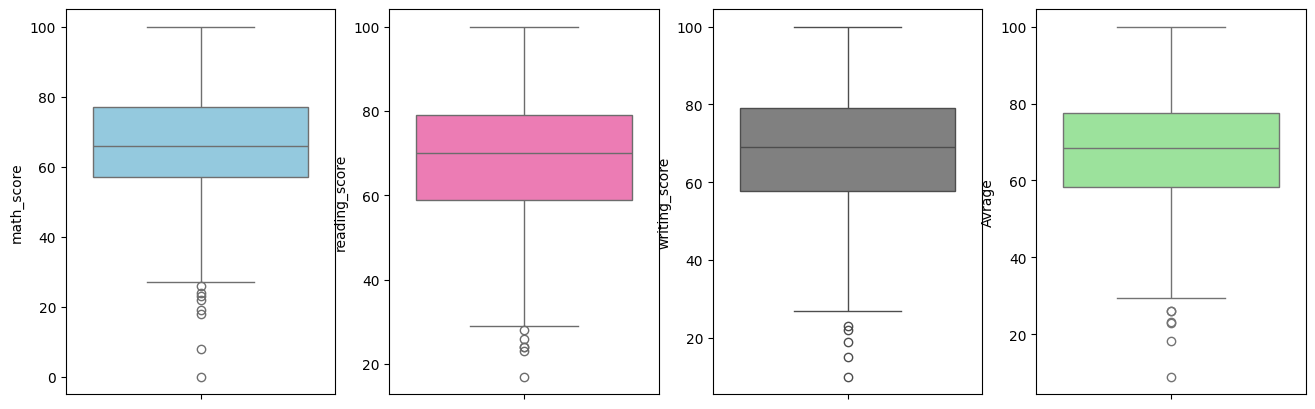

In [25]:
plt.subplots(1,4,figsize =(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'],color='grey')
plt.subplot(1,4,4)
sns.boxplot(df['Avrage'],color='lightgreen')

# **EDA With visualization**

* Histogram
* kernal distribution (KDE) 

In [26]:
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
956,male,group C,some college,standard,none,84,87,81,252,84.00
970,female,group D,bachelor's degree,standard,none,89,100,100,289,96.33


Text(0.5, 1.0, 'distrubtion of Avrage score for the twoo genders')

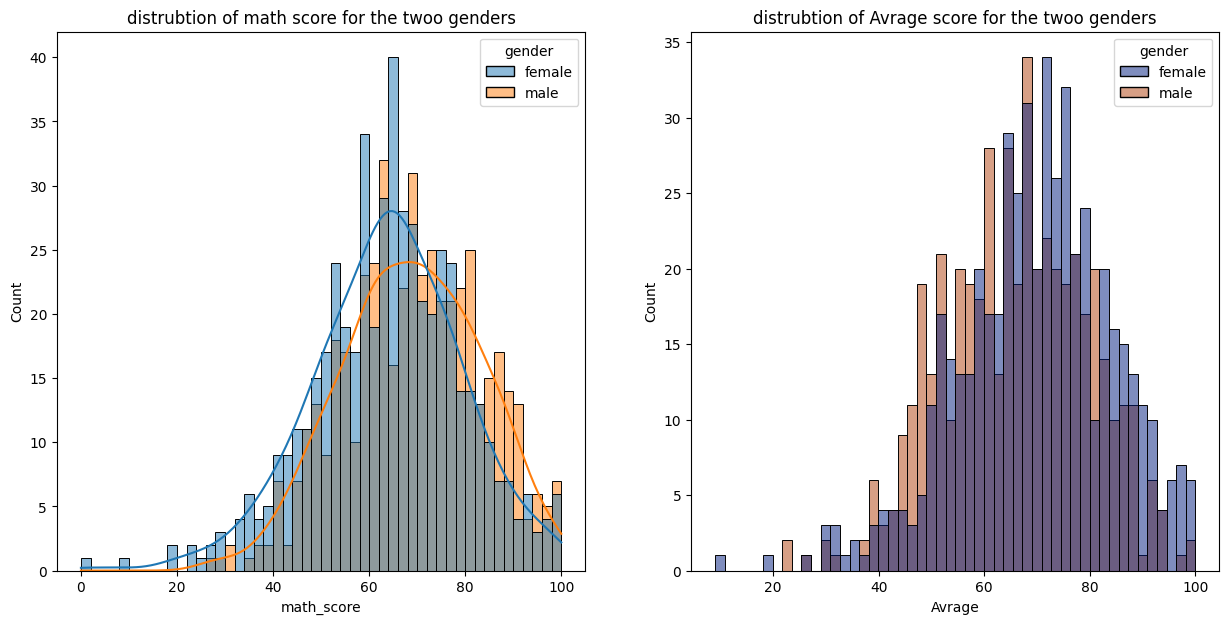

In [27]:
fig,axe = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='math_score',bins=50,kde=True,hue='gender')
plt.title('distrubtion of math score for the twoo genders' )
plt.subplot(122)
sns.histplot(data=df,x='Avrage',bins=50,hue='gender',palette='dark')
plt.title('distrubtion of Avrage score for the twoo genders')


* Female student tend to perform bettre the the student in general
* other wise in math section men are performing bettre

In [28]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
49,male,group C,high school,standard,completed,82,84,82,248,82.67


Text(0.5, 1.0, 'Distrbution of female Avrage marks for the test preparation ')

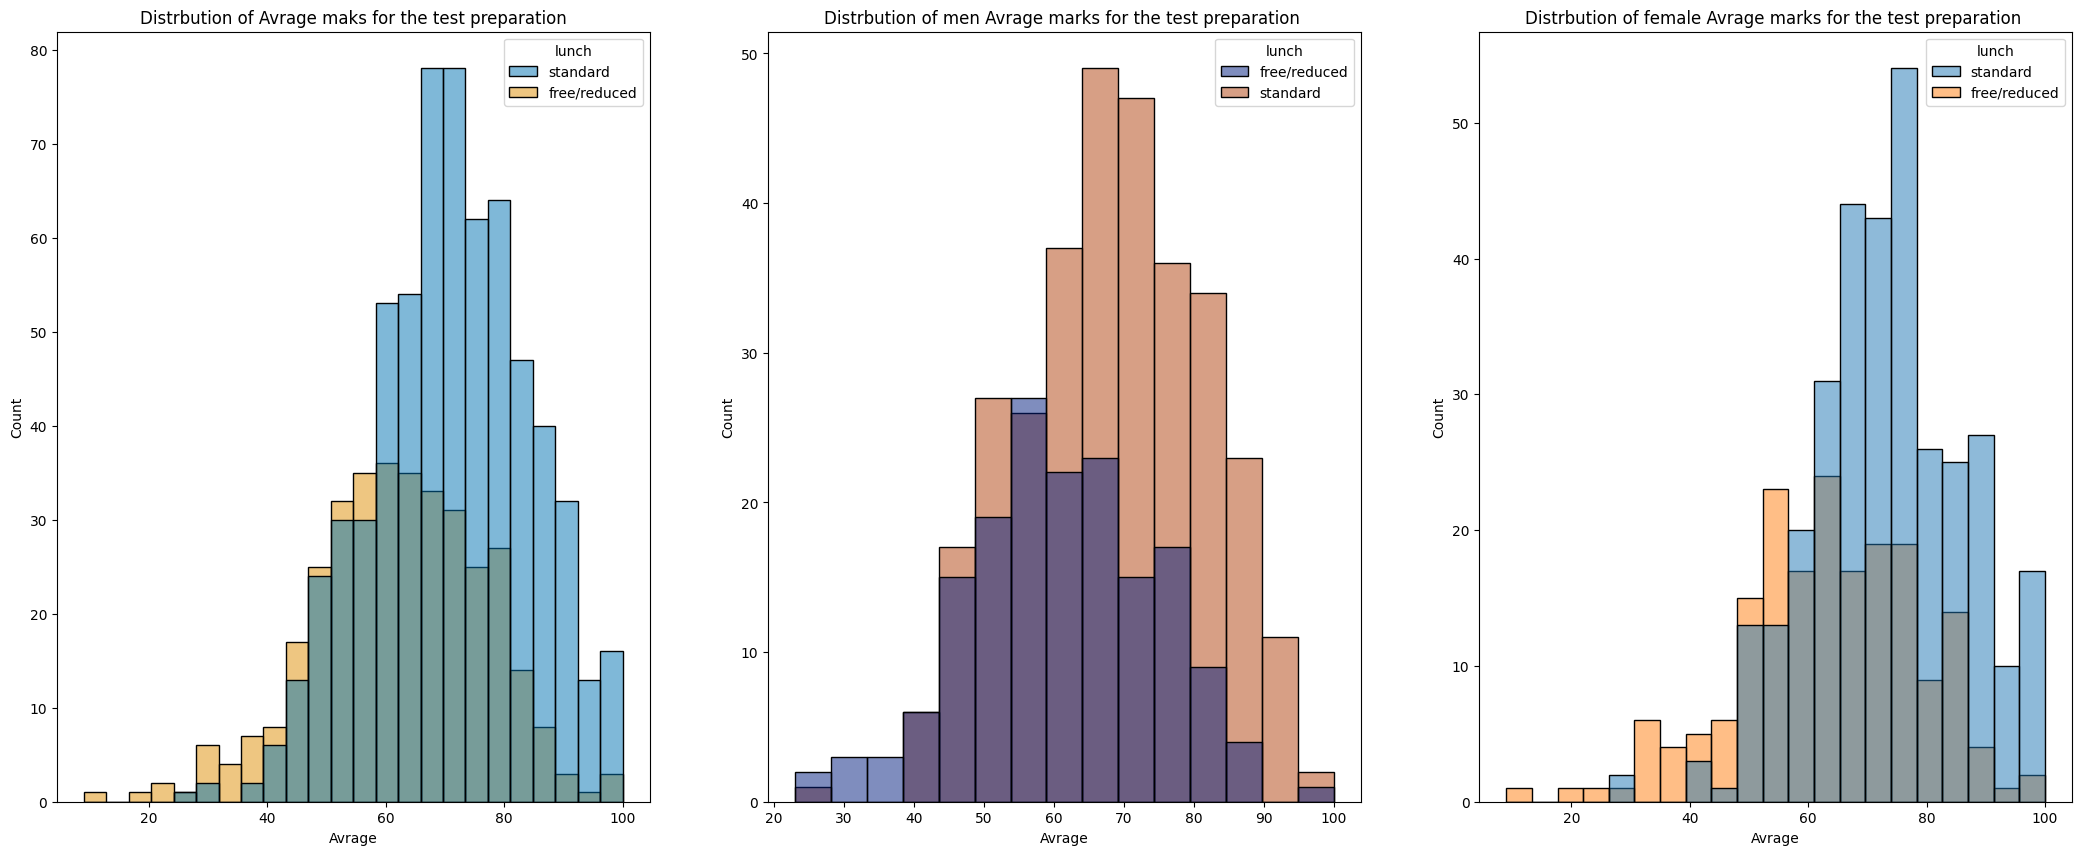

In [29]:
#avrage for the test preperation 

fig,axe = plt.subplots(1,3,figsize =(26,10))
plt.subplot(131)
sns.histplot(data=df,x ='Avrage',hue='lunch',palette='colorblind')
plt.title('Distrbution of Avrage maks for the test preparation')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'male'],x ='Avrage',hue='lunch',palette='dark')
plt.title('Distrbution of men Avrage marks for the test preparation ')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'female'],x ='Avrage',hue='lunch')
plt.title('Distrbution of female Avrage marks for the test preparation ')


we notice that : 
* the lunch (standard) has a positive coroletion wuth the avrage marks 
* the standard lunch helps perform well on exasms both for male and female 

Text(0.5, 1.0, 'parent level of education for female')

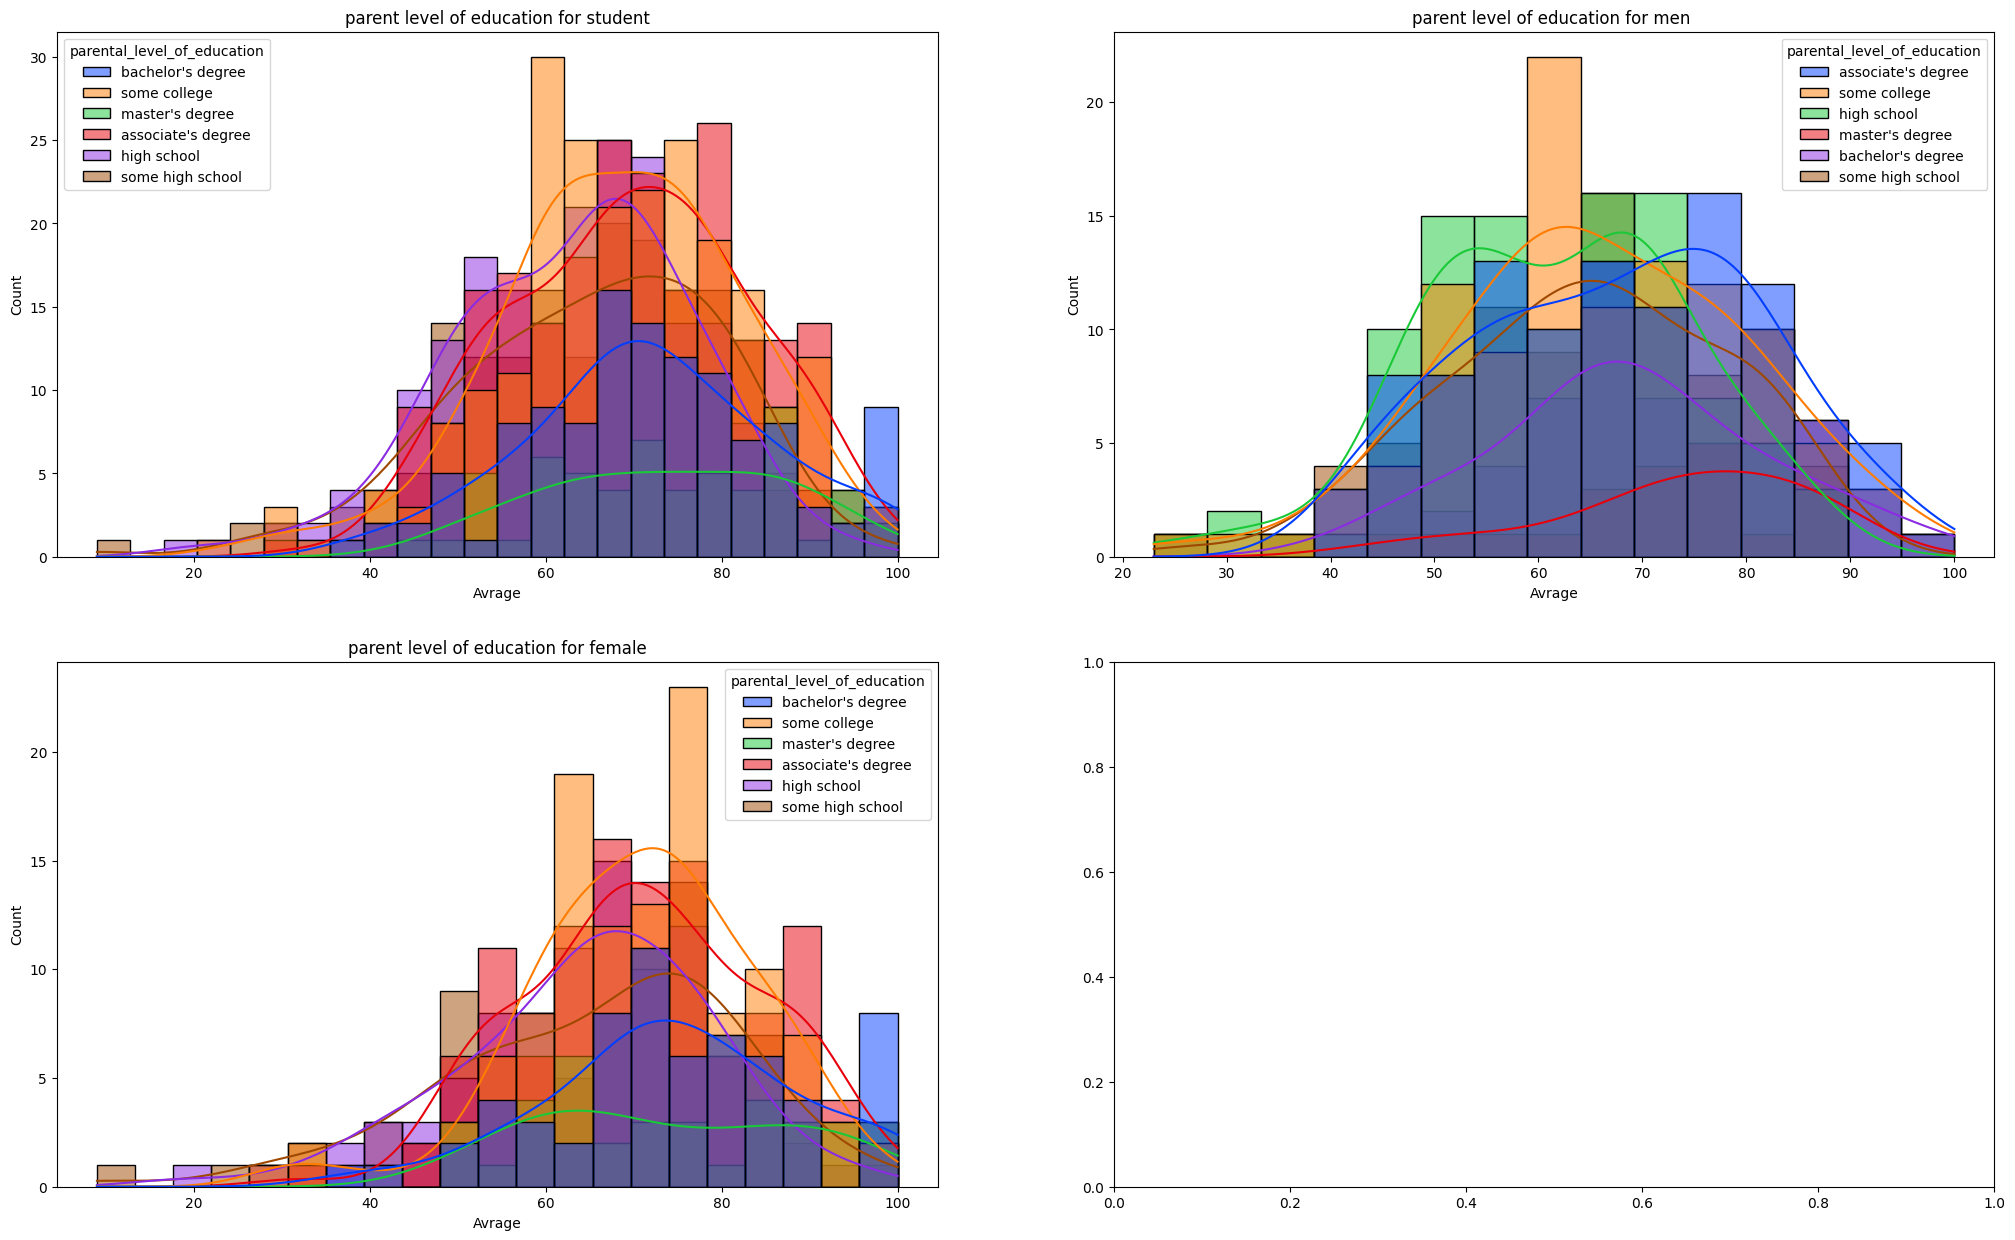

In [30]:
### Avrage for parents level of education 
fig,axe = plt.subplots(2,2,figsize=(25,15))
plot = sns.histplot(ax = axe[0,0],data=df, x = "Avrage",kde=True,hue='parental_level_of_education',palette='bright')
plot.set_title("parent level of education for student")


plot1 = sns.histplot(ax = axe[0,1],data=df[df['gender'] == 'male'], x ="Avrage",kde=True,hue='parental_level_of_education',palette='bright')
plot1.set_title("parent level of education for men ")


plot2 = sns.histplot(ax = axe[1,0],data=df[df['gender'] == 'female'], x ="Avrage",hue='parental_level_of_education',kde = True,palette='bright')
#plot1.set_xticklabels(plot.get_xticklabels(),rotation = 25)
plot2.set_title("parent level of education for female")
                 




Observation : 
* parent level of education has not that importance in related to the student performnce
* for the male plot we see that parent with bachlor's and associate degre their chieldren perform well 
* for female the parent education not relevent to student performance 

In [31]:
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
185,male,group C,associate's degree,free/reduced,completed,65,67,65,197,65.67
792,male,group D,high school,free/reduced,none,66,74,69,209,69.67


Text(0.5, 1.0, 'race ethnicity for female')

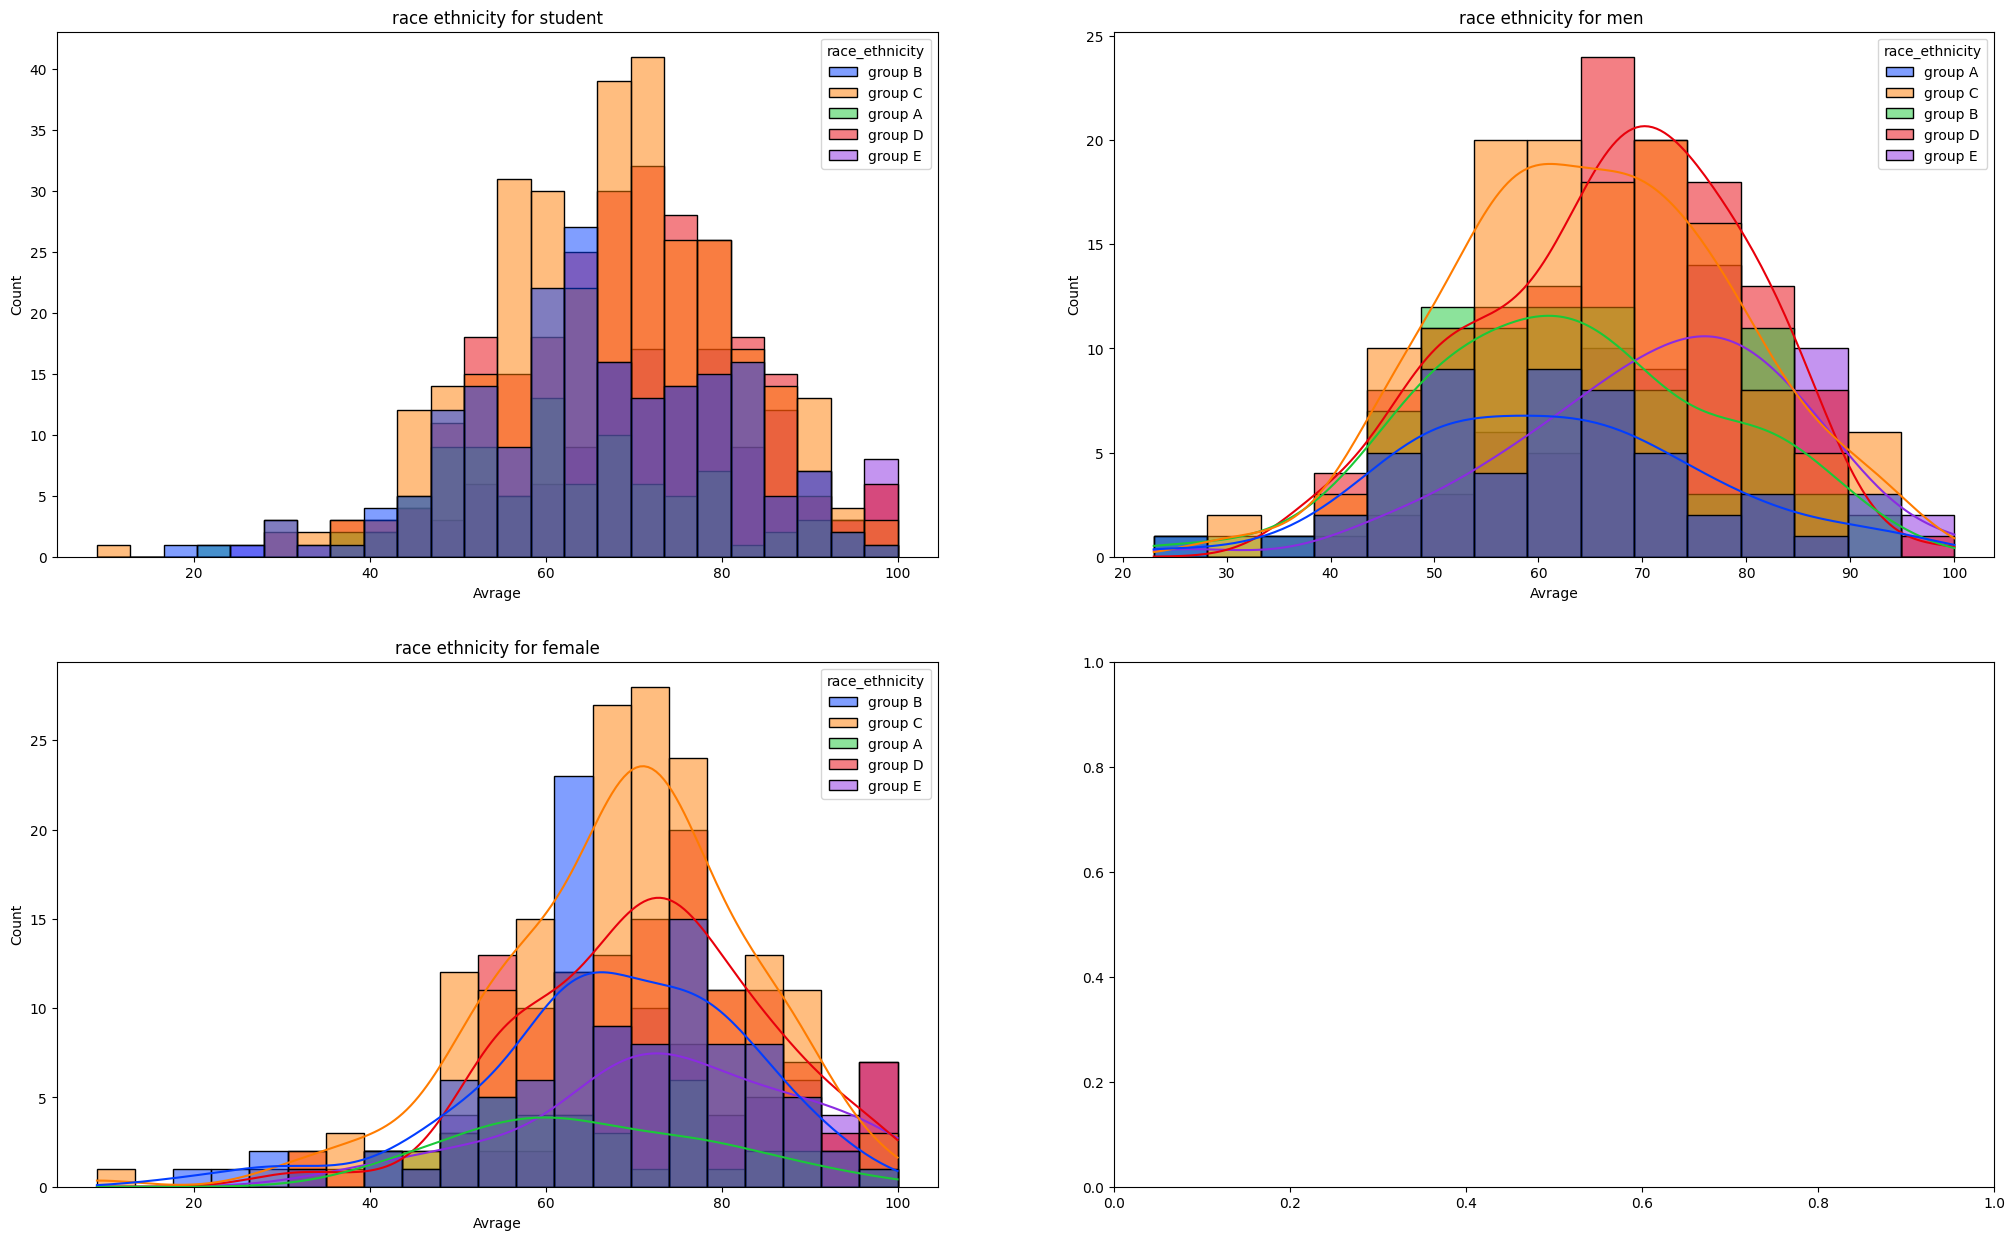

In [32]:
#Avrage marks for race enthncity
fig,axe = plt.subplots(2,2,figsize=(25,15))
plot = sns.histplot(ax = axe[0,0],data=df, x = "Avrage",hue='race_ethnicity',palette='bright')
plot.set_title("race ethnicity for student")


plot1 = sns.histplot(ax = axe[0,1],data=df[df['gender'] == 'male'], x ="Avrage",kde=True,hue='race_ethnicity',palette='bright')
plot1.set_title("race ethnicity for men ")


plot2 = sns.histplot(ax = axe[1,0],data=df[df['gender'] == 'female'], x ="Avrage",hue='race_ethnicity',kde = True,palette='bright')
#plot1.set_xticklabels(plot.get_xticklabels(),rotation = 25)
plot2.set_title("race ethnicity for female")

Observation: 
* we see that Group D and E perform well in exams for the men student 
* other wise Group B perform vey badly in exams for both males and females

**Maximum score of student in all subjects**

<Axes: ylabel='writing_score'>

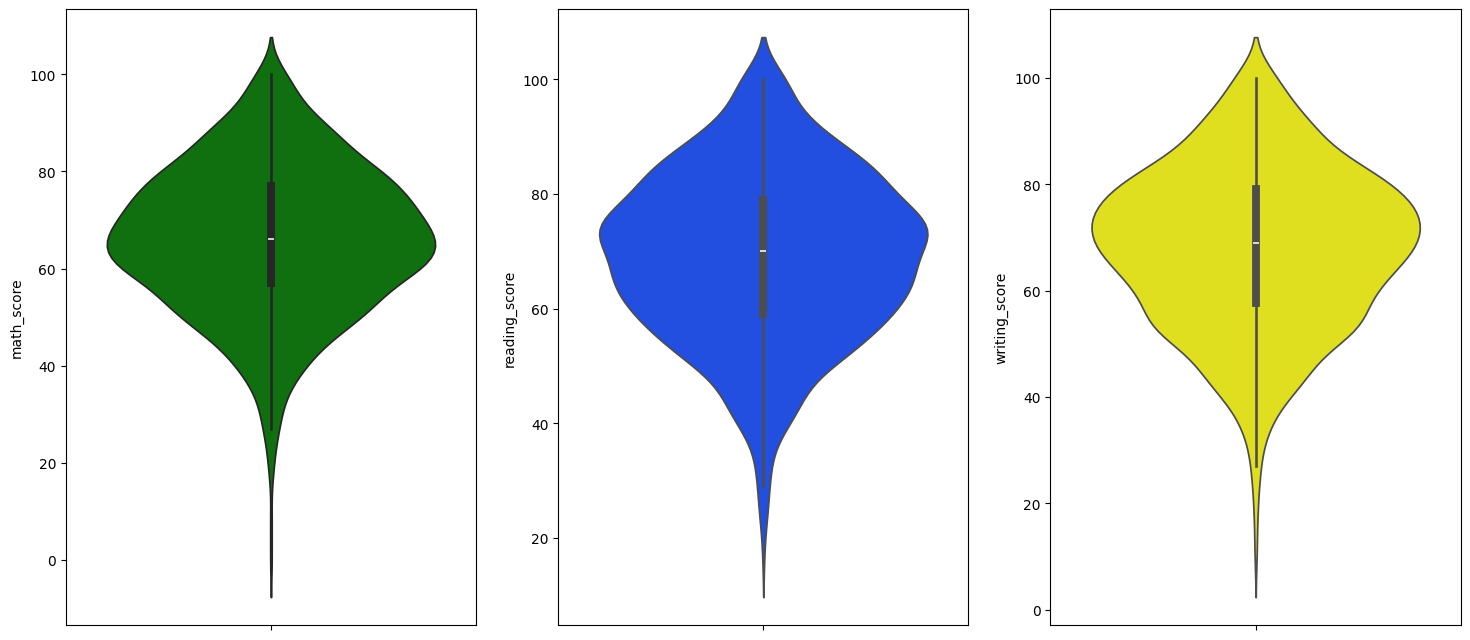

In [33]:
fig,axe = plt.subplots(1,3,figsize=(18,8))

sns.violinplot(ax=axe[0] ,data=df,y='math_score',color='green')

sns.violinplot(ax=axe[1] ,data=df,y='reading_score',palette='bright')

sns.violinplot(ax=axe[2] ,data=df,y='writing_score',color='yellow')



Obeservation : 
* its cleary visible that in math suject most of the studen scoe between 60-80 otherwise at <br> reading and writing subjects the student score between 50 -80 
 

# **Multivirante analysis using pieplot**

In [34]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [35]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
588,female,group C,some college,standard,none,54,64,65,183,61.0


Text(0.5, 1.0, 'Test Prepration Course')

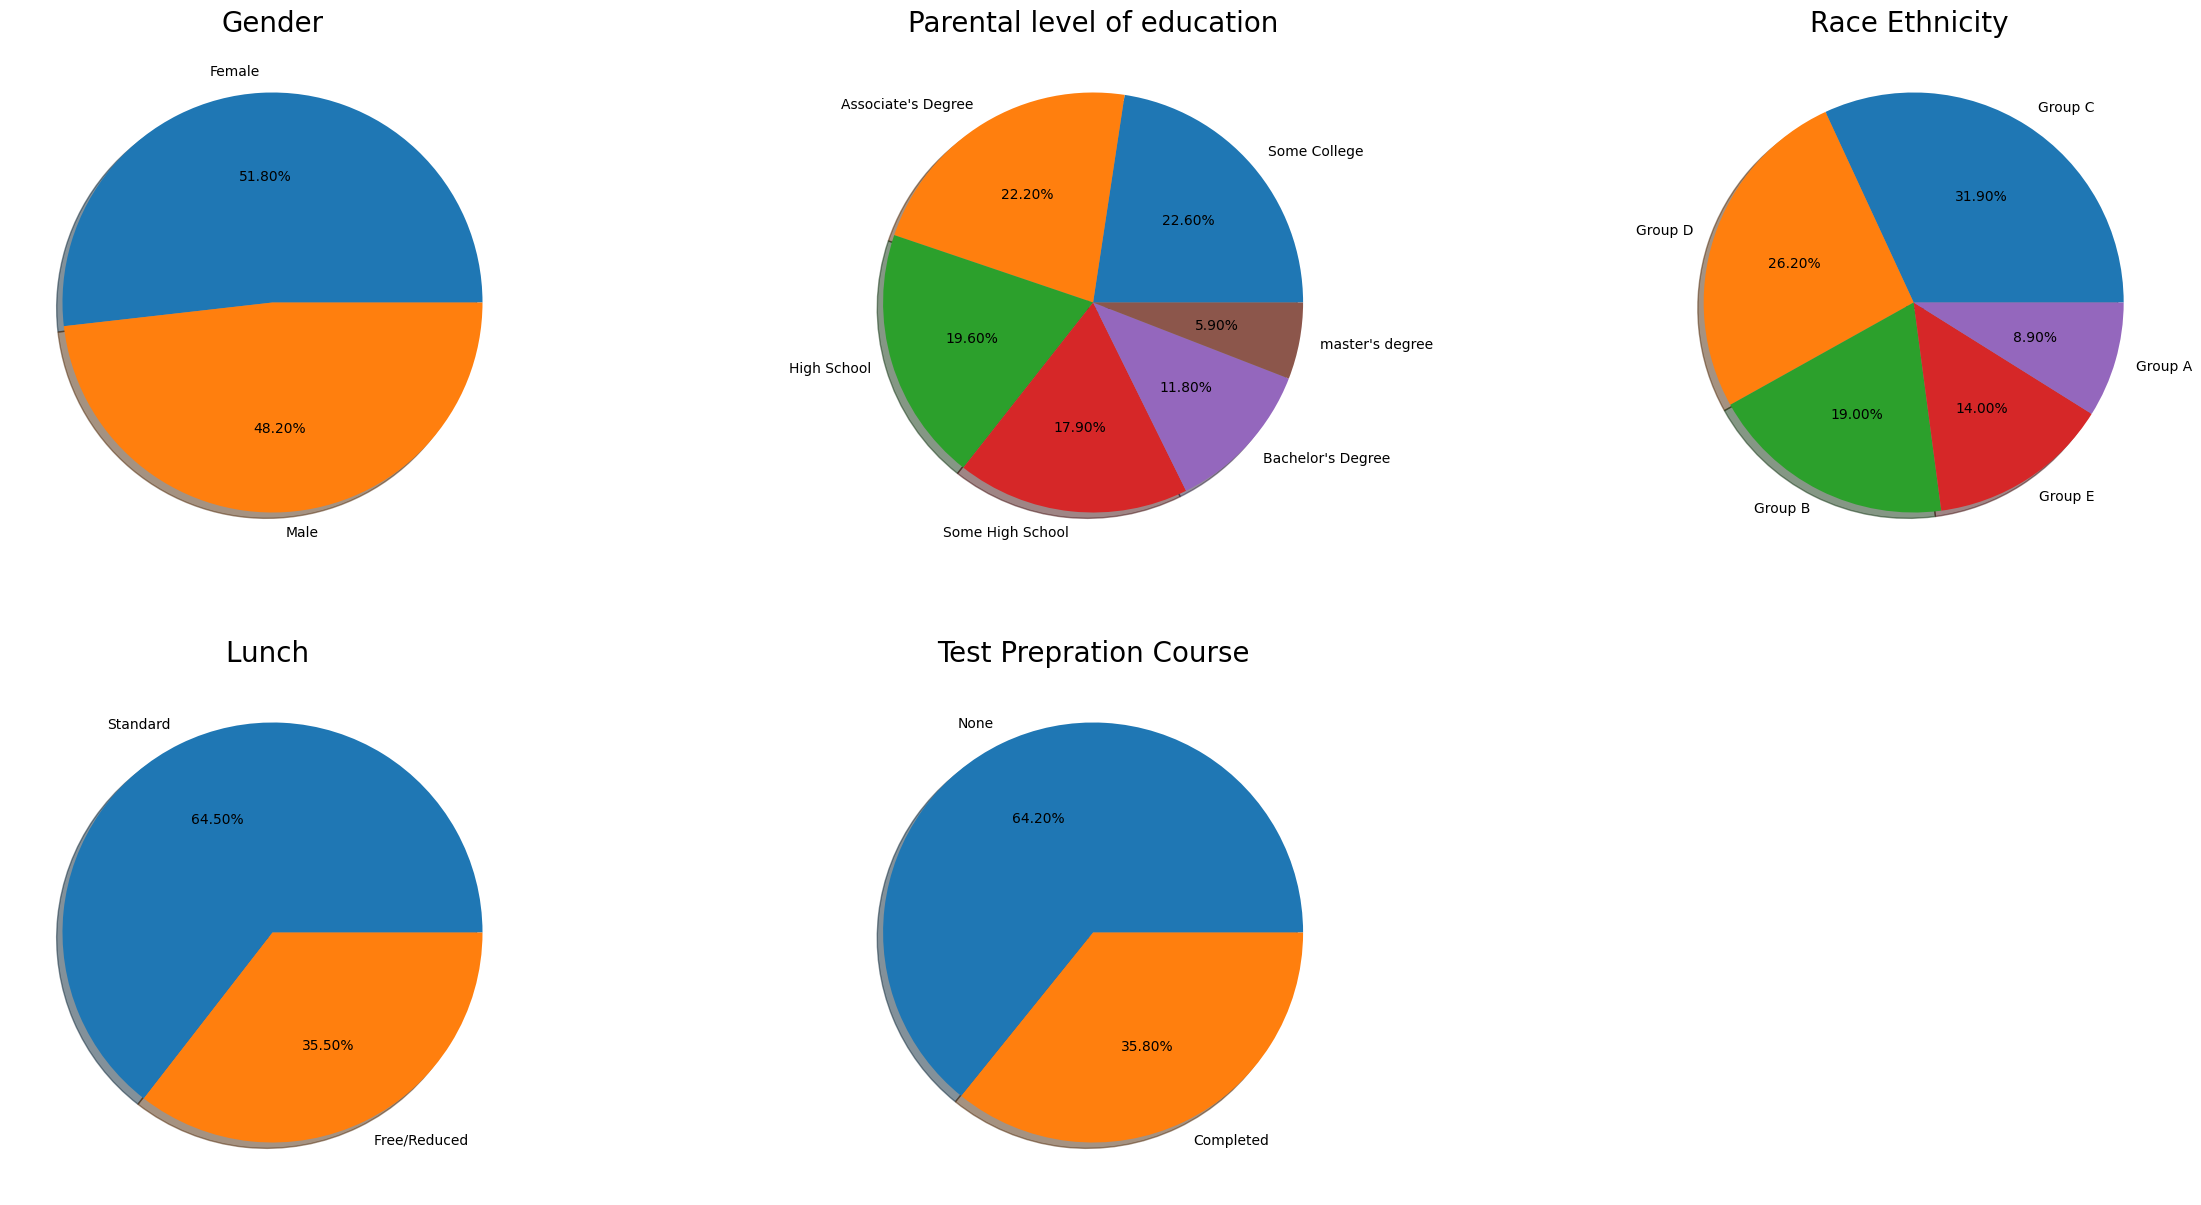

In [36]:
plt.rcParams['figure.figsize'] = (30,15)
plt.subplot(2,3,1)
plt.pie(x= df['gender'].value_counts(),labels=['Female','Male'],autopct='%.2f%%',shadow=True)
plt.title('Gender',fontsize = 20)


plt.subplot(2,3,2) 
plt.pie(x= df['parental_level_of_education'].value_counts(),shadow=True ,labels=['Some College','Associate\'s Degree','High School','Some High School','Bachelor\'s Degree','master\'s degree'],autopct='%.2f%%')
plt.title('Parental level of education',fontsize = 20)

plt.subplot(2,3,3)
plt.pie(x= df['race_ethnicity'].value_counts(),labels=['Group C','Group D','Group B','Group E','Group A'],autopct='%.2f%%',shadow=True)
plt.title('Race Ethnicity ',fontsize = 20)

plt.subplot(2,3,4)
plt.pie(x= df['lunch'].value_counts(),labels=['Standard','Free/Reduced '],autopct='%.2f%%',shadow=True)
plt.title('Lunch ',fontsize = 20)

plt.subplot(2,3,5)
plt.pie(x= df['test_preparation_course'].value_counts(),labels=['None','Completed'],autopct='%.2f%%',shadow=True)
plt.title('Test Prepration Course',fontsize = 20)


Observation : 
* numbers of sudents male and female are almost equal 
* number of students whose parental level education is "Some Collge "is greater followed by "High school"
* number of student whose not enrolled in any test preperation is greateer 
* number of stuent whose have standard lunch is greater 

# **Univariante analysis (How is distribution of Gender)** 

Text(0.5, 1.0, 'Student Performance by Gender')

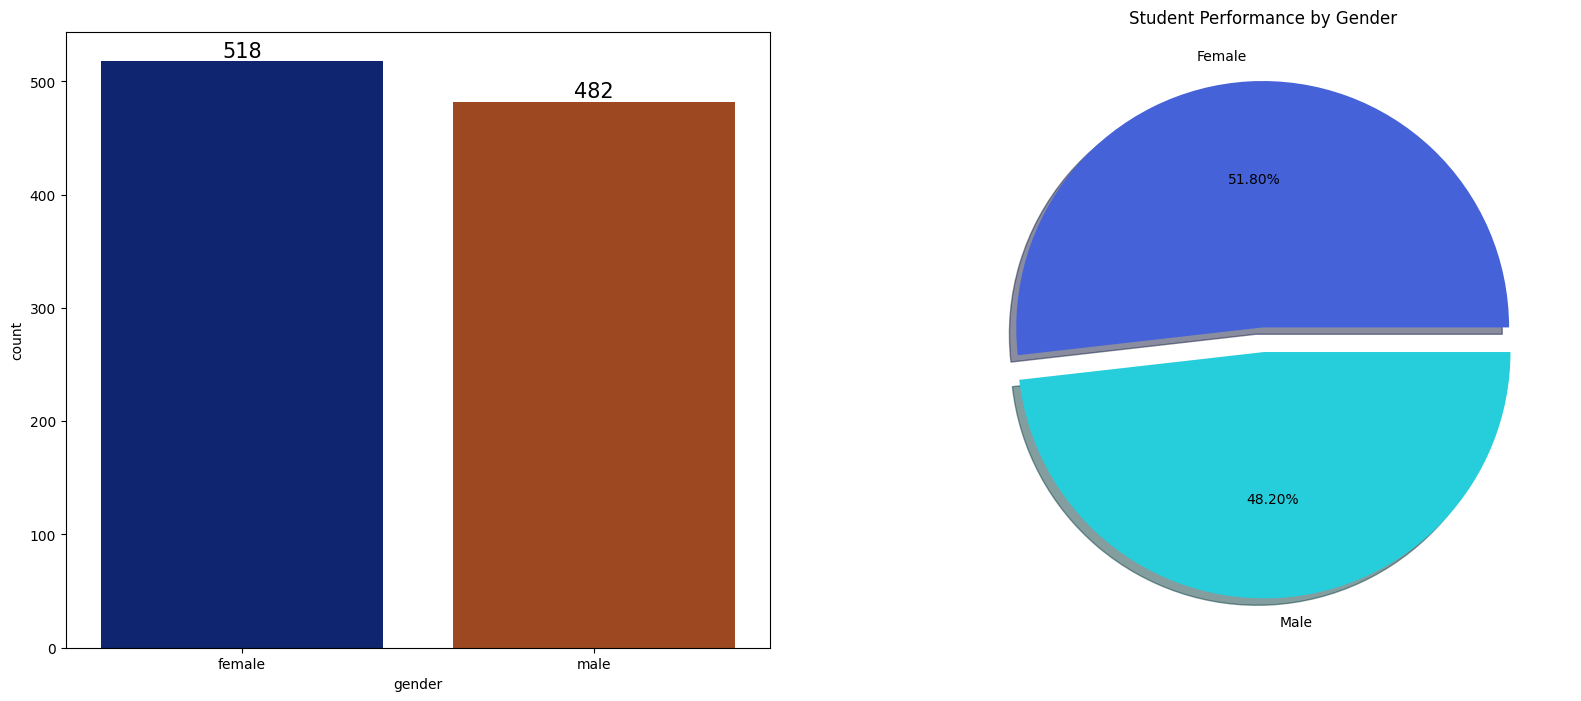

In [37]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.countplot(data=df,x ='gender',palette='dark',ax=ax[0])
for container in ax[0].containers: 
    ax[0].bar_label(container,color = 'black',size = 15)


plt.pie(x = df['gender'].value_counts(),labels=['Female','Male'],autopct='%.2f%%',colors=['#4562D9','#26CDDB'],shadow=True,explode=[0.05,0.05])
plt.title('Student Performance by Gender')


observation: 
* Gender is balanced between male and female 

# **Bivarite Analysis ( is gender has any impacts on student performance?)**

In [38]:
df = df.reindex(columns=['race_ethnicity','parental_level_of_education','lunch','test_preparation_course','gender','math_score','reading_score','writing_score','Total_score','Avrage'])

In [39]:
df_groupby_gender = df.iloc[:,4:].groupby(by='gender').aggregate(['mean']).round(2)
df_groupby_gender

,math_score,reading_score,writing_score,Total_score,Avrage
,mean,mean,mean,mean,mean
gender,,,,,
female,63.63,72.61,72.47,208.71,69.57
male,68.73,65.47,63.31,197.51,65.84


Observation : 
* en generale female have bettre overall scores then men 
* although mmales have scores bettre in math 

In [40]:
female_writing_mean_score = [df_groupby_gender['Total_score'].loc['female']['mean'], df_groupby_gender['writing_score'].iloc[0]['mean']]
male_writing_mean_score = [df_groupby_gender['Total_score'].loc['male']['mean'],df_groupby_gender['writing_score'].iloc[1]['mean']]
male_writing_mean_score

[197.51, 63.31]

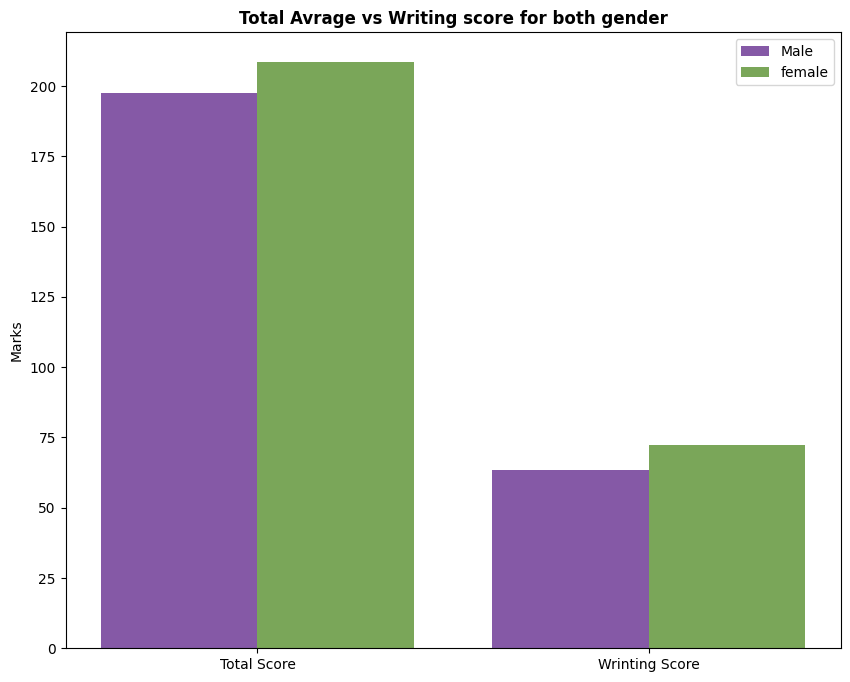

In [41]:
plt.figure(figsize=(10,8))
x = ['Total Score', 'Wrinting Score'] 
X_axsis = np.arange(len(x))
plt.bar(X_axsis-0.2,male_writing_mean_score,0.4,label ='Male',color = '#8559A6')
plt.bar(X_axsis+0.2,female_writing_mean_score,0.4,label ='female',color = '#7AA659')
plt.xticks(X_axsis,x)
plt.ylabel('Marks')
plt.title('Total Avrage vs Writing score for both gender',fontweight = 'bold')
plt.legend()
plt.show()

# Race/ Ethincity coulmn 
* how is race distrubtion 
* is race has any impact on student performance ?


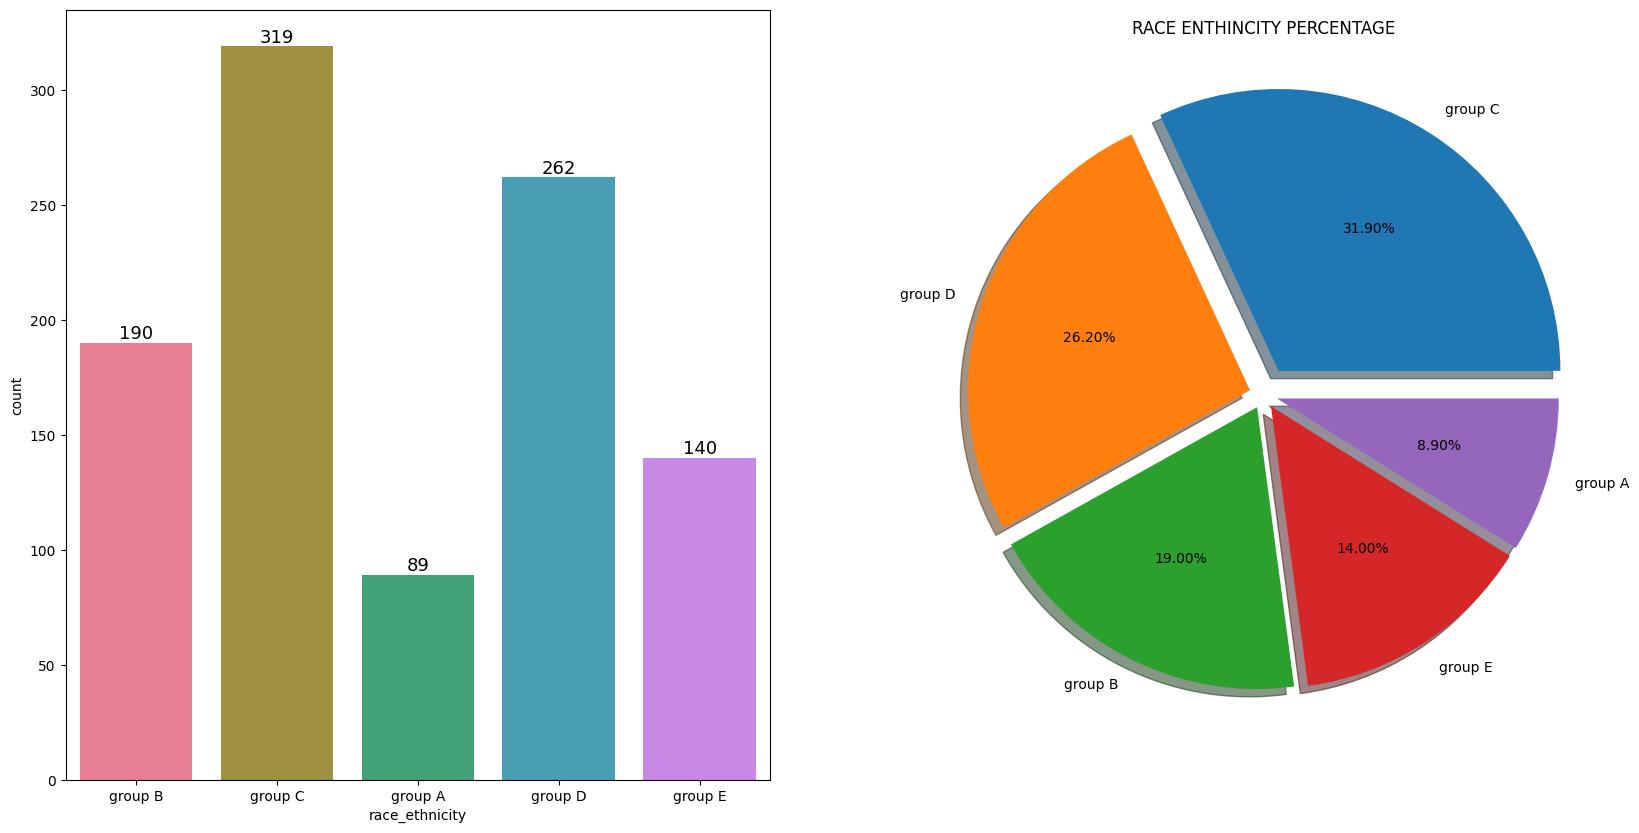

In [42]:
figure, axe  = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['race_ethnicity'],data=df,ax = axe[0], palette='husl')
for container in axe[0].containers:
    axe[0].bar_label(container,color ='black',size=13)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,shadow=True,explode=[0.1,0.05,0.05,0.05,0.05],autopct='%.2f%%')
plt.title("RACE ENTHINCITY PERCENTAGE")
plt.show()

Observation: 
* most of student are from GROUP C and GROUP D 
* lowest nubmber of student are belong to group B 

In [43]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [44]:
df.head()

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,gender,math_score,reading_score,writing_score,Total_score,Avrage
0,group B,bachelor's degree,standard,none,female,72,72,74,218,72.67
1,group C,some college,standard,completed,female,69,90,88,247,82.33
2,group B,master's degree,standard,none,female,90,95,93,278,92.67
3,group A,associate's degree,free/reduced,none,male,47,57,44,148,49.33
4,group C,some college,standard,none,male,76,78,75,229,76.33


# **Bivriate analysis**

In [45]:
df2 = df.reindex(columns=['parental_level_of_education','lunch','test_preparation_course','gender','race_ethnicity','math_score','reading_score','writing_score','Total_score','Avrage'])
df_race= df2.iloc[:,4:].groupby(by ='race_ethnicity').aggregate(['mean']).round(2)
df_race

,math_score,reading_score,writing_score,Total_score,Avrage
,mean,mean,mean,mean,mean
race_ethnicity,,,,,
group A,61.63,64.67,62.67,188.98,62.99
group B,63.45,67.35,65.60,196.41,65.47
group C,64.46,69.10,67.83,201.39,67.13
group D,67.36,70.03,70.15,207.54,69.18
group E,73.82,73.03,71.41,218.26,72.75


In [46]:
df_race

,math_score,reading_score,writing_score,Total_score,Avrage
,mean,mean,mean,mean,mean
race_ethnicity,,,,,
group A,61.63,64.67,62.67,188.98,62.99
group B,63.45,67.35,65.60,196.41,65.47
group C,64.46,69.10,67.83,201.39,67.13
group D,67.36,70.03,70.15,207.54,69.18
group E,73.82,73.03,71.41,218.26,72.75


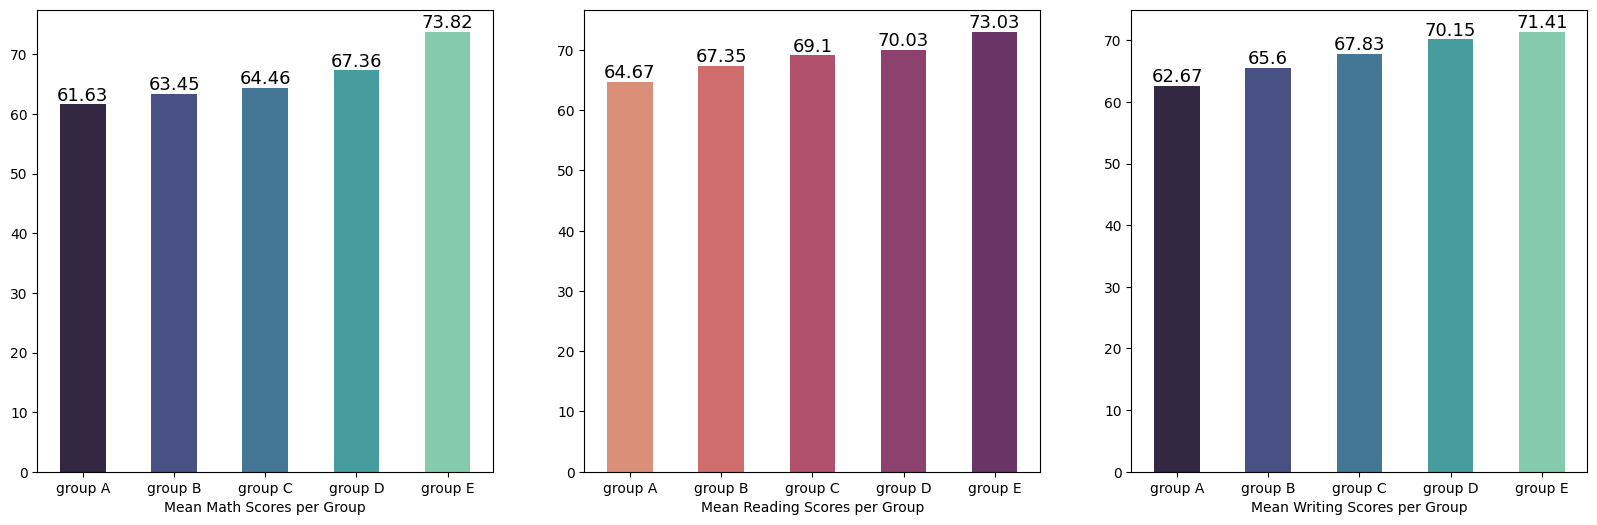

In [47]:
f,axe=plt.subplots(1,3,figsize=(20,6))
plot1 =sns.barplot(data= df_race,y =df_race['math_score']['mean'].values,x=df_race['math_score']['mean'].index,ax =axe[0],palette= 'mako',width=0.5)
plot1.set_xlabel('Mean Math Scores per Group')

for c in axe[0].containers: 
    axe[0].bar_label(c,color='black',size=13)

plot2 =sns.barplot(data= df_race,y =df_race['reading_score']['mean'].values,x=df_race['reading_score']['mean'].index,ax =axe[1],palette= 'flare',width=0.5)
for c in axe[1].containers: 
    axe[1].bar_label(c,color='black',size=13)
plot2.set_xlabel('Mean Reading Scores per Group')

plot3 =sns.barplot(data= df_race,y =df_race['writing_score']['mean'].values,x=df_race['writing_score']['mean'].index,ax =axe[2],palette= 'mako',width=0.5)
plot3.set_xlabel('Mean Writing Scores per Group')
for c in axe[2].containers: 
    axe[2].bar_label(c,color='black',size=13)


# Parental Level of Education 
* how is Parental level of education ?
* is parental level of educaion has any impact on student performance ?

In [48]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Text(0.5, 0, 'Number of Parents ')

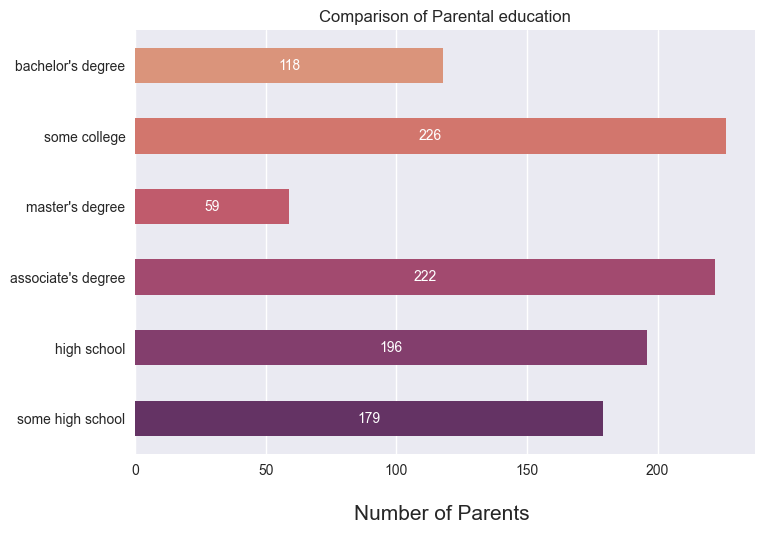

In [49]:
plt.rcParams['figure.figsize'] = (11,6)
plt.style.use('seaborn-v0_8')
ax = sns.countplot(df['parental_level_of_education'],palette='flare',width=0.5)
for c in ax.containers: 
    ax.bar_label(c,color='White',size =10,label_type='center')
ax.set_title('Comparison of Parental education')
ax.set_ylabel('')
ax.set_xlabel('Number of Parents ',fontsize = 15,labelpad=20)



Observation : 
* smalest number of parents are from master degeree
* largest number of parents are from some college and associate's degree 

In [50]:
df_parent =df.reindex(columns=['gender','lunch','test_preparation_course','race_ethnicity','parental_level_of_education','math_score','reading_score','writing_score','Total_score','Avrage'])

In [51]:
df_parent =df_parent.iloc[:,4:].groupby('parental_level_of_education').aggregate(['mean'])

In [52]:
df_parent

,math_score,reading_score,writing_score,Total_score,Avrage
,mean,mean,mean,mean,mean
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.568964
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923983
high school,62.137755,64.704082,62.448980,189.290816,63.097194
master's degree,69.745763,75.372881,75.677966,220.796610,73.598644
some college,67.128319,69.460177,68.840708,205.429204,68.476106
some high school,63.497207,66.938547,64.888268,195.324022,65.107654


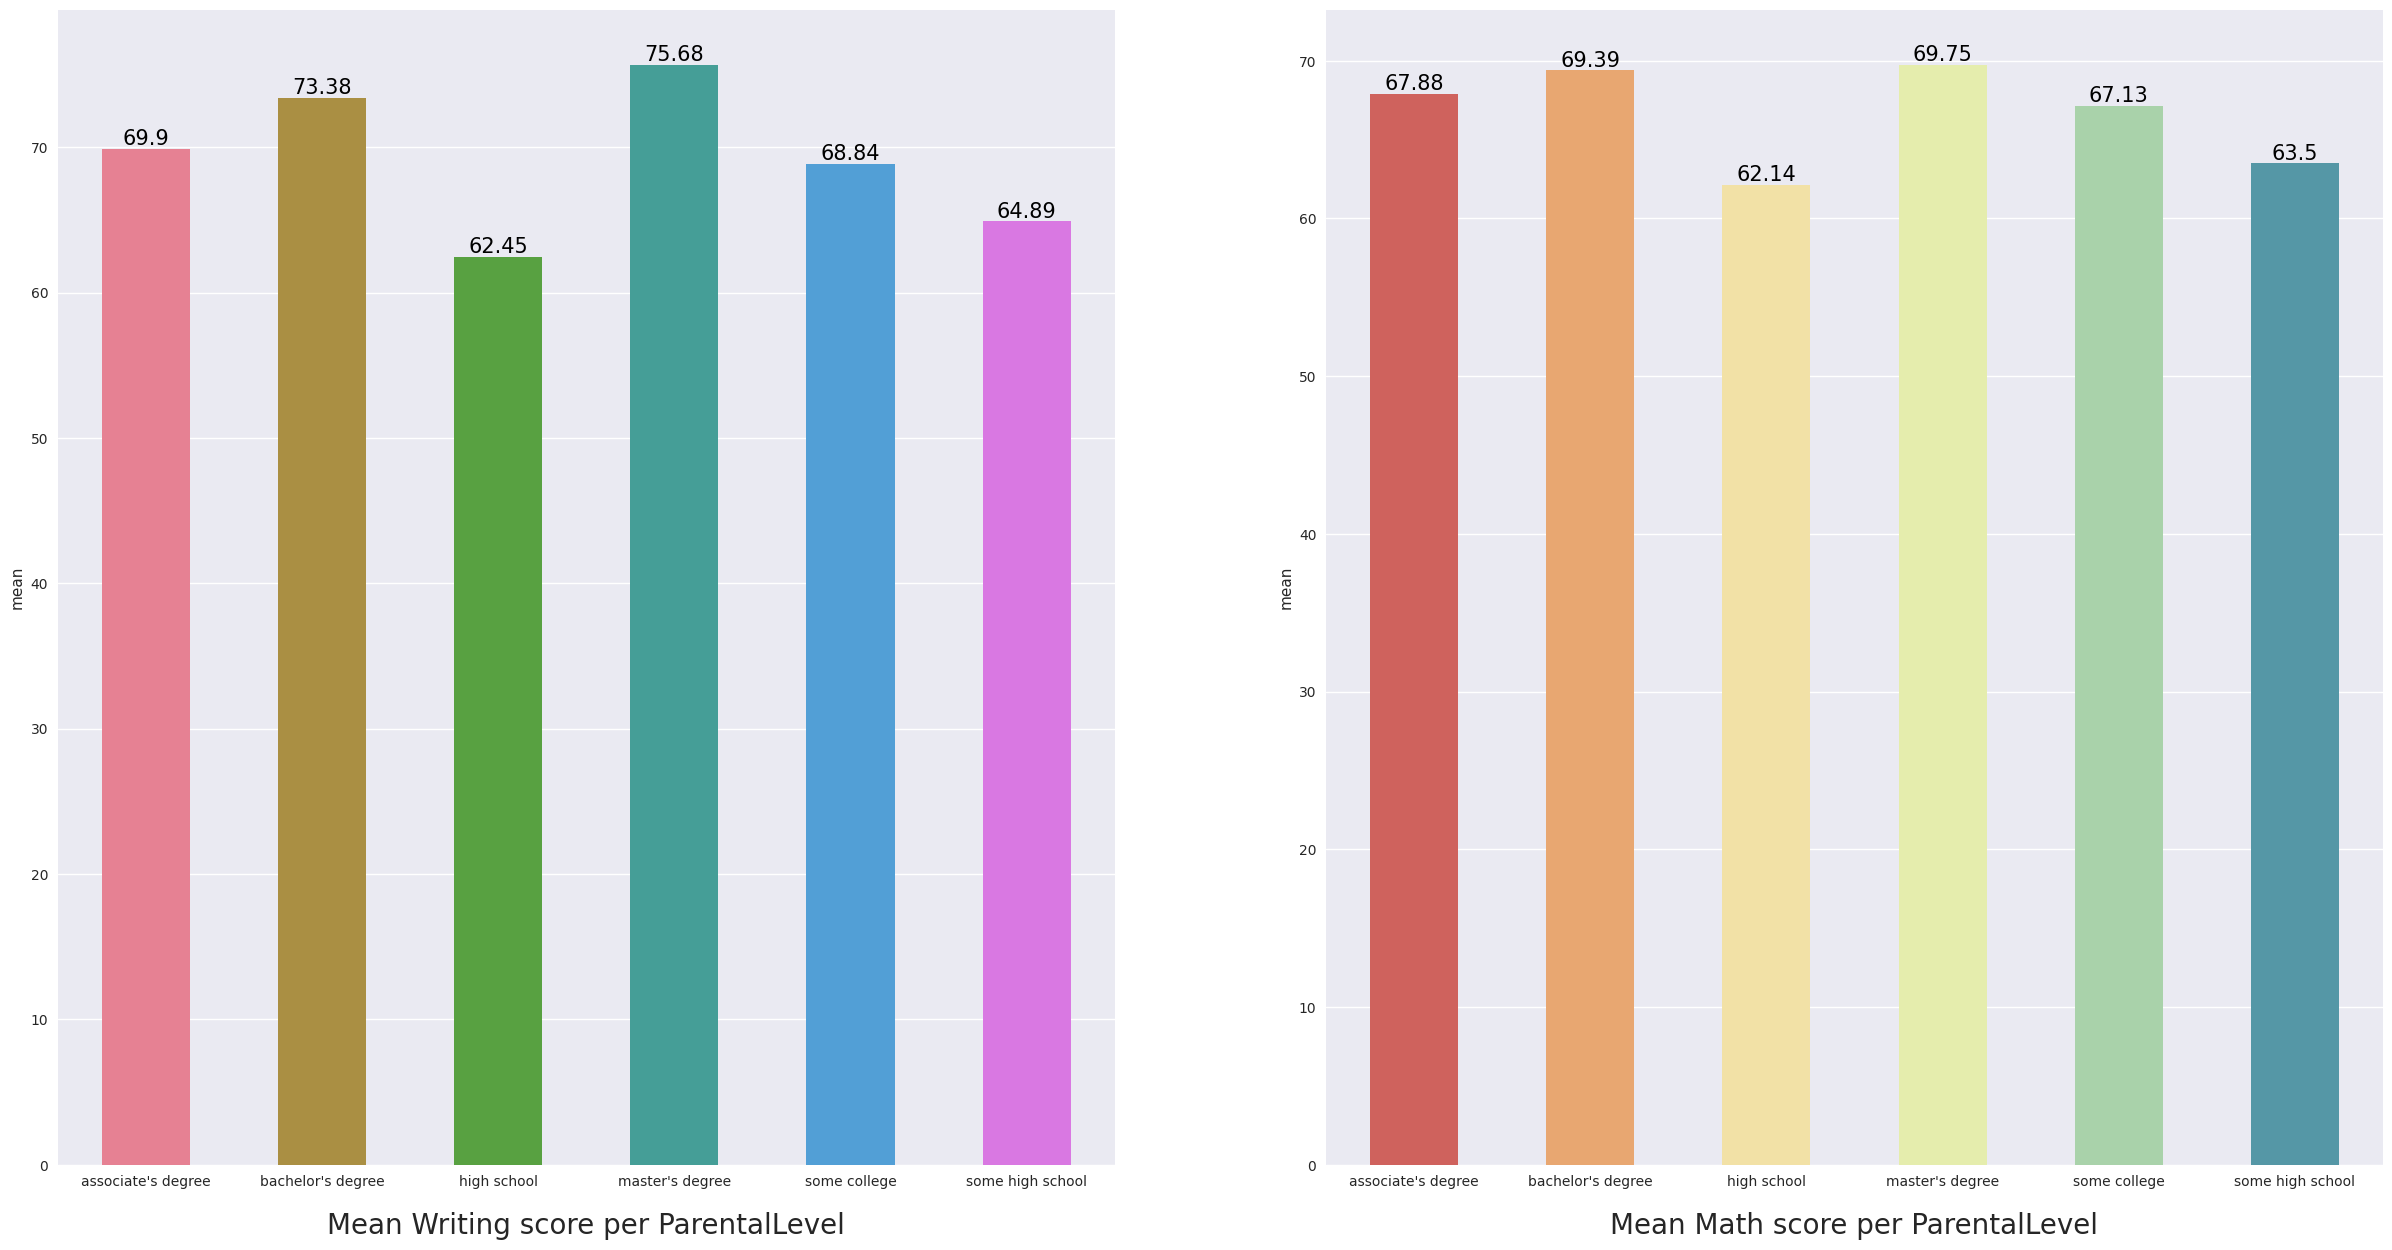

In [53]:
fig,axe = plt.subplots(1,2,figsize=(30,15))
plt.style.use('default')
sns.barplot(x =df_parent['writing_score']['mean'].index,y =df_parent['writing_score']['mean'].round(2),width=0.5,palette='husl',ax=axe[0])
axe[0].set_xlabel('Mean Writing score per ParentalLevel',fontsize = 20,labelpad=17)
for c in axe[0].containers: 
    axe[0].bar_label(c,color ='black',fontsize =15)

sns.barplot(x =df_parent['math_score']['mean'].index,y =df_parent['math_score']['mean'].round(2),width=0.5,palette='Spectral',ax=axe[1])
axe[1].set_xlabel('Mean Math score per ParentalLevel',fontsize = 20,labelpad=17)
for c in axe[1].containers: 
    axe[1].bar_label(c,color ='black',fontsize =15)


observation: 
* parent level educaton has no direct relation with student marks 
* studen who have high school parent level of educaion are always make less notes 

In [54]:
df.head()

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,gender,math_score,reading_score,writing_score,Total_score,Avrage
0,group B,bachelor's degree,standard,none,female,72,72,74,218,72.67
1,group C,some college,standard,completed,female,69,90,88,247,82.33
2,group B,master's degree,standard,none,female,90,95,93,278,92.67
3,group A,associate's degree,free/reduced,none,male,47,57,44,148,49.33
4,group C,some college,standard,none,male,76,78,75,229,76.33


# lunch 
* how is lunch distrubtion  ?
* is lunch has any impact on student performance ?

In [55]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [56]:

df['lunch'].value_counts().index

Index(['standard', 'free/reduced'], dtype='object', name='lunch')

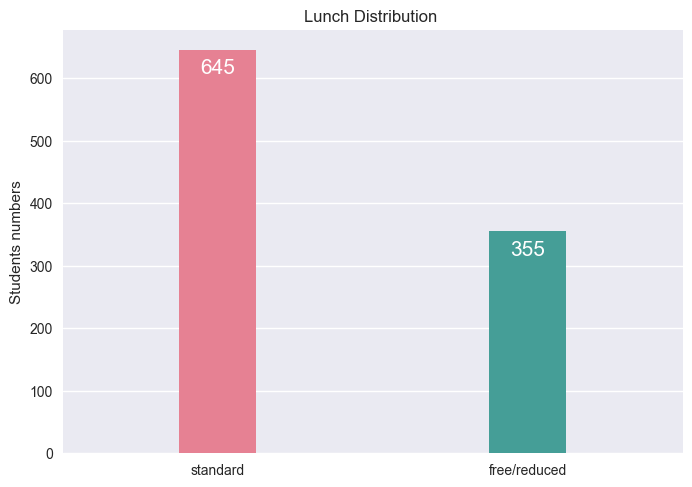

In [57]:
plt.rcParams['figure.figsize'] =(15,9)
plt.style.use('seaborn-v0_8')
plot_lunch = sns.countplot(data =df,x='lunch',palette='husl',width=0.25)
for c in plot_lunch.containers: 
    plot_lunch.bar_label(c,color ='white',fontsize =15,padding=-20)

plt.title('Lunch Distribution ')
plt.ylabel('Students numbers')
plt.xlabel('')
plt.show()

Observation : 
* number of student who has a standrd lunch is allmost the double 

In [58]:
df[df['Avrage']>80].sort_values('Avrage')

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,gender,math_score,reading_score,writing_score,Total_score,Avrage
545,group E,some high school,free/reduced,completed,male,78,83,80,241,80.33
223,group D,some high school,standard,none,male,86,80,75,241,80.33
469,group C,some college,standard,none,male,91,74,76,241,80.33
541,group D,associate's degree,free/reduced,completed,male,79,82,80,241,80.33
35,group E,associate's degree,standard,completed,male,81,81,79,241,80.33
...,...,...,...,...,...,...,...,...,...,...
712,group D,some college,standard,none,female,98,100,99,297,99.00
114,group E,bachelor's degree,standard,completed,female,99,100,100,299,99.67
962,group E,associate's degree,standard,none,female,100,100,100,300,100.00
458,group E,bachelor's degree,standard,none,female,100,100,100,300,100.00


## is lunch has any impact on student performance ?

<Axes: xlabel='lunch', ylabel='Avrage'>

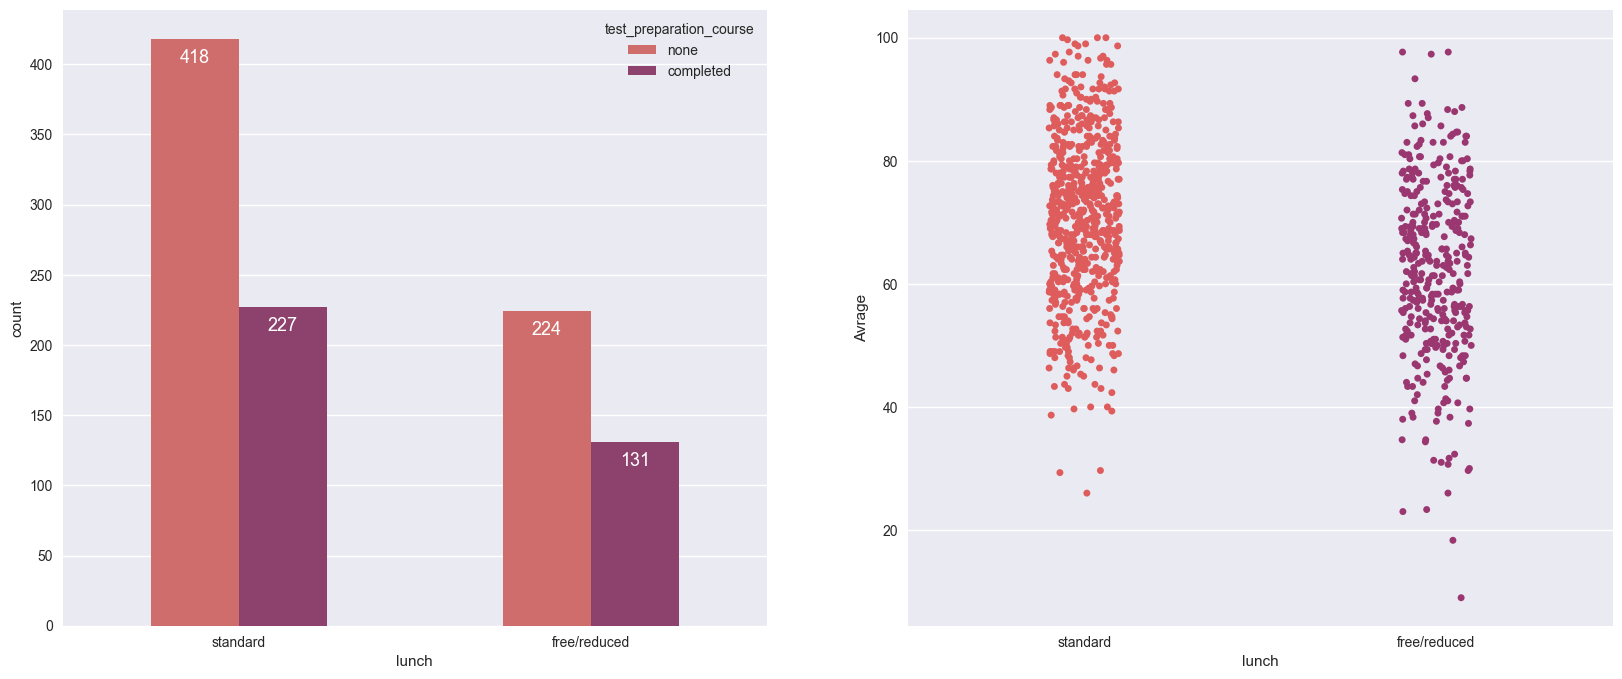

In [59]:
fig,axe = plt.subplots(1,2,figsize =(20,8))
sns.countplot(data =df,x ='lunch',hue='test_preparation_course',ax =axe[0],width=0.5,palette='flare')
for c in axe[0].containers: 
    axe[0].bar_label(c,color='white',fontsize =13,padding =-20)


sns.stripplot(data =df,x ='lunch',y =df['Avrage'],ax =axe[1],palette='flare')



* the lunch category hasan impact the high avrage values are with 'Standard lunch'

In [60]:
df

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,gender,math_score,reading_score,writing_score,Total_score,Avrage
0,group B,bachelor's degree,standard,none,female,72,72,74,218,72.67
1,group C,some college,standard,completed,female,69,90,88,247,82.33
2,group B,master's degree,standard,none,female,90,95,93,278,92.67
3,group A,associate's degree,free/reduced,none,male,47,57,44,148,49.33
4,group C,some college,standard,none,male,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,female,88,99,95,282,94.00
996,group C,high school,free/reduced,none,male,62,55,55,172,57.33
997,group C,high school,free/reduced,completed,female,59,71,65,195,65.00
998,group D,some college,standard,completed,female,68,78,77,223,74.33


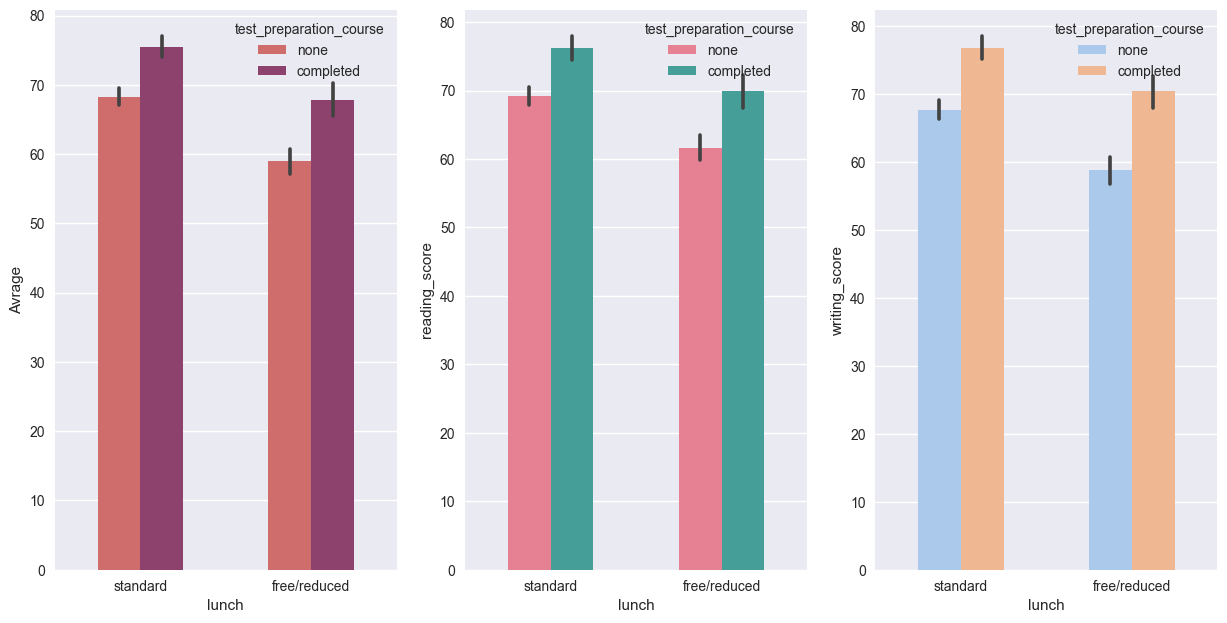

In [61]:
plt.figure(figsize =(15,16))
plt.subplot(2,3,1)
pl_test =sns.barplot(x=df['lunch'],y=df['Avrage'].round(2),hue=df['test_preparation_course'],width=0.5,palette='flare')

plt.subplot(2,3,2)
pl1 =sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'],width=0.5,palette='husl')

plt.subplot(2,3,3)
pl1 =sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'],width=0.5,palette='pastel')


* Student who has completed the test preparation and have standard lunch  have scored more 

# Conclusion 

* Student performance is related to lunch ,race, parental level of education 
* female leads in pass percentage and are top scorers


In [62]:
df.to_csv('Data\cleaned_data.csv',index=False)